In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\sabar\Downloads\\DecisionTree+RandomForest+EnsembleTechniques\\admission.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


corr_matrix=x.corr()
corr_matrix

In [5]:
df.shape

(500, 9)

In [6]:
import seaborn as sns

In [7]:
sns.pairplot?

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [65]:
sns.heatmap(df,annot=True)

In [109]:
(df['University Rating'].value_counts()/500)*100

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64

In [ ]:
df['GRE Score'].max()

In [ ]:
df['GRE Score'].min()

In [ ]:
df.info()

In [10]:
cod=[]
for i in df['Chance of Admit ']:
    if i>=0.80:
        cod.append(1)
    else:
        cod.append(0)

In [11]:
df['admit'] = cod

In [12]:
df = df.drop('Chance of Admit ',axis=1)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [15]:
x=df.drop('admit',axis=1)

In [16]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [17]:
y=df[['admit']]

In [18]:
y

,admit
0,1
1,0
2,0
3,1
4,0
...,...
495,1
496,1
497,1
498,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((350, 8), (150, 8), (350, 1), (150, 1))

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()

In [24]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
train_pred=dt.predict(x_train)

In [26]:
test_pred=dt.predict(x_test)

In [27]:
train_pred,test_pred

(array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc_train =accuracy_score(y_train,train_pred)

In [30]:
acc

NameError: name 'acc' is not defined

In [31]:
acc_test=accuracy_score(y_test,test_pred)

In [32]:
acc_test

0.9133333333333333

In [33]:
DecisionTreeClassifier?


In [34]:
dtnew=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,min_samples_split=2,min_samples_leaf=2,max_features=5)

In [35]:
dtnew

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=2)

In [36]:
dtnew.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=2)

In [37]:
test_pred=dtnew.predict(x_test)

In [38]:
train_pred=dtnew.predict(x_train)

In [39]:
accu_train=accuracy_score(y_train,train_pred)

In [40]:
accu_test=accuracy_score(y_test,test_pred)

In [41]:
accu_train,accu_test

(0.9771428571428571, 0.8866666666666667)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
import numpy as np

In [44]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':np.arange(1,11),
             'min_samples_split':np.arange(1,6),
              'min_samples_leaf':np.arange(1,6),
              'max_features':np.arange(1,5),
             }

In [45]:
grid_param

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([1, 2, 3, 4, 5]),
 'min_samples_leaf': array([1, 2, 3, 4, 5]),
 'max_features': array([1, 2, 3, 4])}

In [46]:
from sklearn.model_selection import KFold

In [47]:
kfold=KFold(n_splits=10)

In [48]:
estimator=DecisionTreeClassifier()

In [49]:
GridSearchCV?


In [50]:
gridsearch=GridSearchCV(estimator,param_grid=grid_param,scoring= 'accuracy',n_jobs=-1,cv = kfold,verbose=0)

In [51]:
gridsearch.fit(x_train,y_train)

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.78285714 0.82       ... 0.88857143 0.89714286 0.88285714]
  category=UserWarning


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 2, 3, 4, 5])},
             scoring='accuracy')

In [52]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [53]:
train_pred=gridsearch.predict(x_train)

In [54]:
test_pred=gridsearch.predict(x_test)

In [55]:
train_pred,test_pred

(array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 

In [77]:
accu_train=accuracy_score(y_train,train_pred)

In [78]:
accu_test=accuracy_score(y_test,test_pred)

In [80]:
accu_train,accu_test

(0.9114285714285715, 0.9133333333333333)

In [59]:
from sklearn.tree import plot_tree

In [60]:
estimator = gridsearch.best_estimator_

[Text(167.4, 190.26, 'X[3] <= 3.5\nentropy = 0.916\nsamples = 350\nvalue = [234, 116]'),
 Text(83.7, 135.9, 'X[6] <= 8.845\nentropy = 0.485\nsamples = 219\nvalue = [196, 23]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 4.75\nentropy = 0.176\nsamples = 190\nvalue = [185, 5]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.15\nsamples = 185\nvalue = [181, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 101.5\nentropy = 0.958\nsamples = 29\nvalue = [11, 18]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.918\nsamples = 27\nvalue = [9, 18]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 319.5\nentropy = 0.869\nsamples = 131\nvalue = [38, 93]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 8.765\nentropy = 0.516\nsamples = 26\nvalue = [23, 3]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\ns

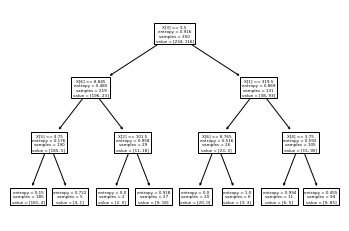

In [61]:
plot_tree(estimator)

In [62]:
from sklearn.tree import export_graphviz

In [63]:
%matplotlib qt
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_train.columns,
                class_names = np.array(['No','yes']),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()

In [74]:
grid_param = {'n_estimators':[10,20,30],
             'max_depth':np.arange(1,11),
             'min_samples_split':np.arange(1,6),
              'min_samples_leaf':np.arange(1,6),
              'max_features':np.arange(1,5),
             }

In [75]:
gridsearch=GridSearchCV(estimator=rf,param_grid=grid_param,scoring= 'accuracy',n_jobs=-1,cv = kfold,verbose=0)

In [76]:
gridsearch.fit(x_train,y_train)

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.89428571 0.90571429 0.90571429]
  category=UserWarning
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [81]:
train_pred=gridsearch.predict(x_train)

In [82]:
test_pred=gridsearch.predict(x_test)

In [83]:
accu_test=accuracy_score(y_test,test_pred)

In [84]:
accu_train=accuracy_score(y_train,train_pred)

In [86]:
accu_test,accu_train

(0.9466666666666667, 0.9228571428571428)

In [87]:
from xgboost import XGBClassifier

In [89]:
xgb=XGBClassifier()

In [90]:
XGBClassifier?

In [ ]:
grid_param = {'n_estimators':[10,20,30],
             'max_depth':np.arange(1,11),
             'min_samples_split':np.arange(1,6),
              'min_samples_leaf':np.arange(1,6),
              'max_features':np.arange(1,5),
             }

AttributeError: module 'numpy' has no attribute 'arrange'

In [95]:
gridsearch=GridSearchCV(estimator=xgb,param_grid=grid_param,scoring= 'accuracy',n_jobs=-1,cv = kfold,verbose=0)

In [96]:
gridsearch.fit(x_train,y_train)

C:\Users\sabar\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan,...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
              

In [97]:
train_pred=gridsearch.predict(x_train)

In [98]:
test_pred=gridsearch.predict(x_test)

In [99]:
accu_test=accuracy_score(y_test,test_pred)

In [102]:
accu_train=accuracy_score(y_train,train_pred)

In [103]:
accu_test,accu_train

(0.9466666666666667, 0.92)

In [ ]:
decision tree is the best model becuase the difference between test and train values is small